<a href="https://colab.research.google.com/github/aroslavakudrevic577-coder/python-ai-kudrevic-yaroslava/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем персональный GitHub-репозиторий в Google Colab
- Загружаем CSV-файл `film_location_money.csv` с информацией о фильмах, локациях съёмок и кассовых сборах
- Очищаем столбцы: удаляем технический столбец `film` (URL Wikidata), переименовываем `filmLabel` → `film`, `locationLabel` → `location`, `boxOffice` → `box_office`
- Приводим числовое поле `box_office` к типу `int`

**Результат:** Чистая таблица `df_films` с полями:
- `film` — название фильма
- `location` — локация съёмок
- `box_office` — кассовые сборы (USD)

In [1]:
# 📥 [0] Клонирование репозитория и загрузка данных о фильмах

import os
import pandas as pd

# Шаг 1: Клонируем ваш персональный репозиторий
github_user = "aroslavakudrevic577-coder"
repo = "python-ai-kudrevic-yaroslava"

repo_path = f"/content/{repo}"
if not os.path.exists(repo_path):
    !git clone -q https://github.com/{github_user}/{repo}.git
if os.getcwd() != repo_path:
    %cd {repo_path}

print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем CSV-файл с информацией о фильмах
df_films = pd.read_csv("data/film_location_money.csv")
print(f"📊 Загружено строк в df_films: {len(df_films)}\n")

# Шаг 3: Очистка данных
# Удаляем технический столбец film (URL Wikidata)
if 'film' in df_films.columns:
    df_films = df_films.drop(columns=['film'])
    print("✅ Удалён столбец 'film' (URL Wikidata)")

# Переименовываем столбцы для удобства
rename_map = {}
if 'filmLabel' in df_films.columns:
    rename_map['filmLabel'] = 'film'
if 'locationLabel' in df_films.columns:
    rename_map['locationLabel'] = 'location'
if 'boxOffice' in df_films.columns:
    rename_map['boxOffice'] = 'box_office'

if rename_map:
    df_films = df_films.rename(columns=rename_map)
    print(f"✅ Переименованы столбцы: {rename_map}")

# Приводим кассовые сборы к целому числу
if 'box_office' in df_films.columns:
    df_films['box_office'] = (
        pd.to_numeric(df_films['box_office'], errors='coerce')
        .fillna(0)
        .astype(int)
    )
    print("✅ Столбец 'box_office' приведён к типу int")
else:
    print("⚠️ Столбец 'box_office' не найден, преобразование пропущено")

print("\n✅ Данные очищены\n")

# Шаг 4: Краткий обзор датасета
print("📋 Структура df_films (фильмы, локации, кассовые сборы):")
print(f"   Столбцы: {', '.join(df_films.columns)}")
print(f"   Уникальных фильмов: {df_films['film'].nunique()}")
print(f"   Уникальных локаций съёмок: {df_films['location'].nunique()}")
print(f"   Всего записей: {len(df_films)}")

print("\n💰 Статистика по кассовым сборам (USD):")
stats = df_films['box_office'].describe()
print(f"   Минимум:    ${stats['min']:,.0f}")
print(f"   Максимум:   ${stats['max']:,.0f}")
print(f"   Среднее:    ${stats['mean']:,.0f}")
print(f"   Медиана:    ${stats['50%']:,.0f}")

print("\n🔍 Первые 3 строки данных:")
print(df_films.head(3).to_string(index=False))

/content/python-ai-kudrevic-yaroslava
✅ Репозиторий готов

📊 Загружено строк в df_films: 8551

✅ Удалён столбец 'film' (URL Wikidata)
✅ Переименованы столбцы: {'filmLabel': 'film', 'locationLabel': 'location', 'boxOffice': 'box_office'}
✅ Столбец 'box_office' приведён к типу int

✅ Данные очищены

📋 Структура df_films (фильмы, локации, кассовые сборы):
   Столбцы: film, location, box_office
   Уникальных фильмов: 2438
   Уникальных локаций съёмок: 1749
   Всего записей: 8551

💰 Статистика по кассовым сборам (USD):
   Минимум:    $0
   Максимум:   $3,200,000,000
   Среднее:    $200,029,613
   Медиана:    $95,708,457

🔍 Первые 3 строки данных:
                      film  location  box_office
             Преследование    Лондон       48500
Безбрежное Саргассово море    Ямайка       45306
              Цена красоты Австралия       56101


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#🌟 Промпт 1: Разведочный анализ




💡 Инсайт 1: Большинство фильмов имеют сборы до 500 млн долларов, а фильмы со сборами выше 1 млрд встречаются крайне редко.


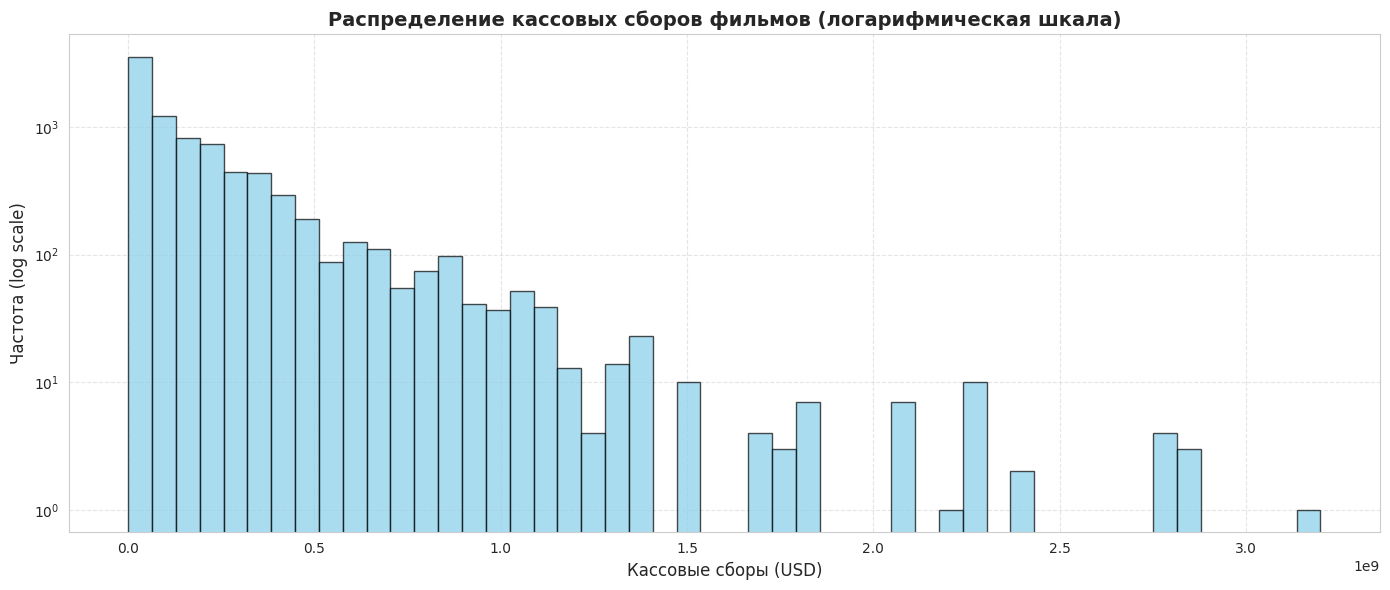


💡 Инсайт 2: Лос-Анджелес, Нью-Йорк и Калифорния — безусловные лидеры по числу съёмок, что отражает концентрацию киноиндустрии в США.


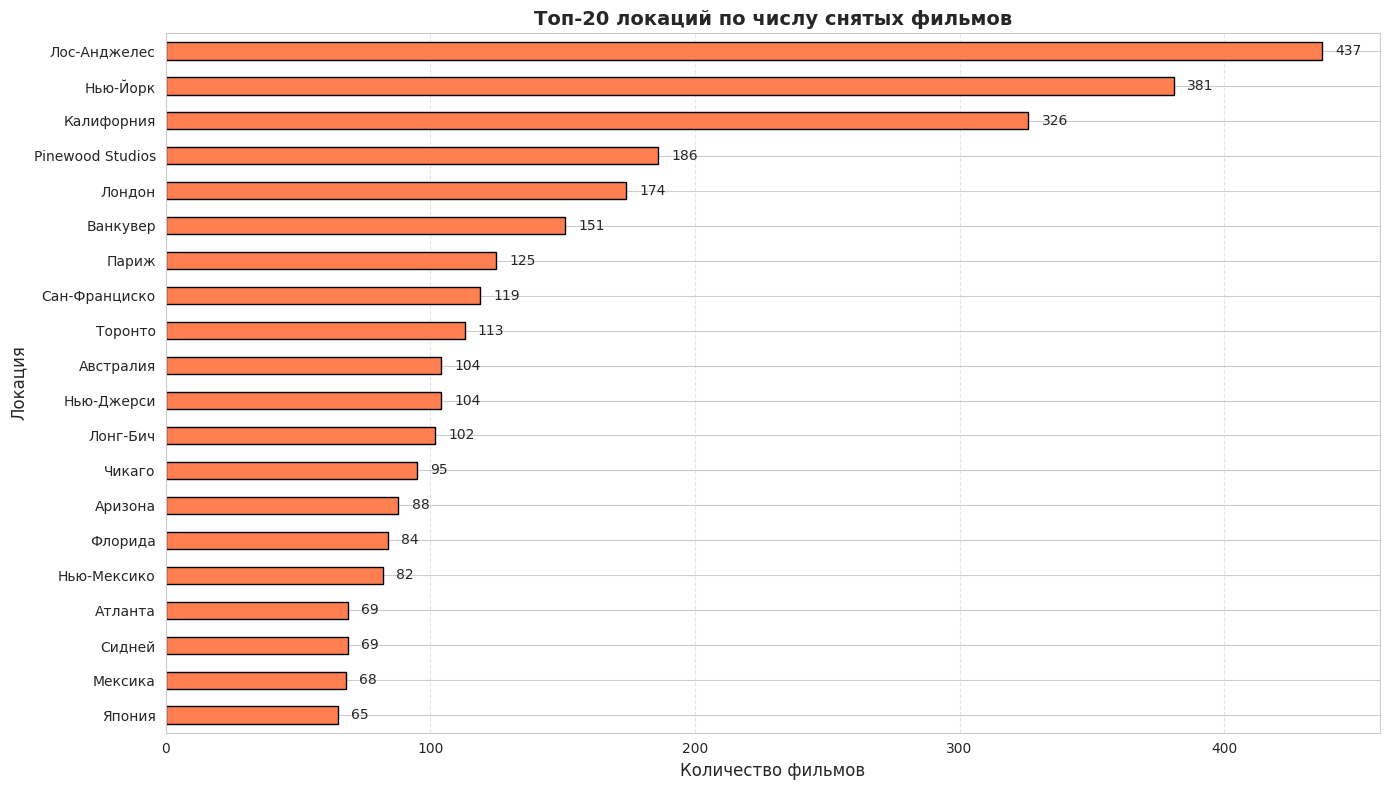


💡 Инсайт 3: Дели (один фильм «Жил-был тигр») генерирует огромные сборы, обгоняя многие популярные локации. Это показывает влияние единичных блокбастеров.


/tmp/ipython-input-203/3403740747.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x/1e9:.1f} млрд' for x in ticks])


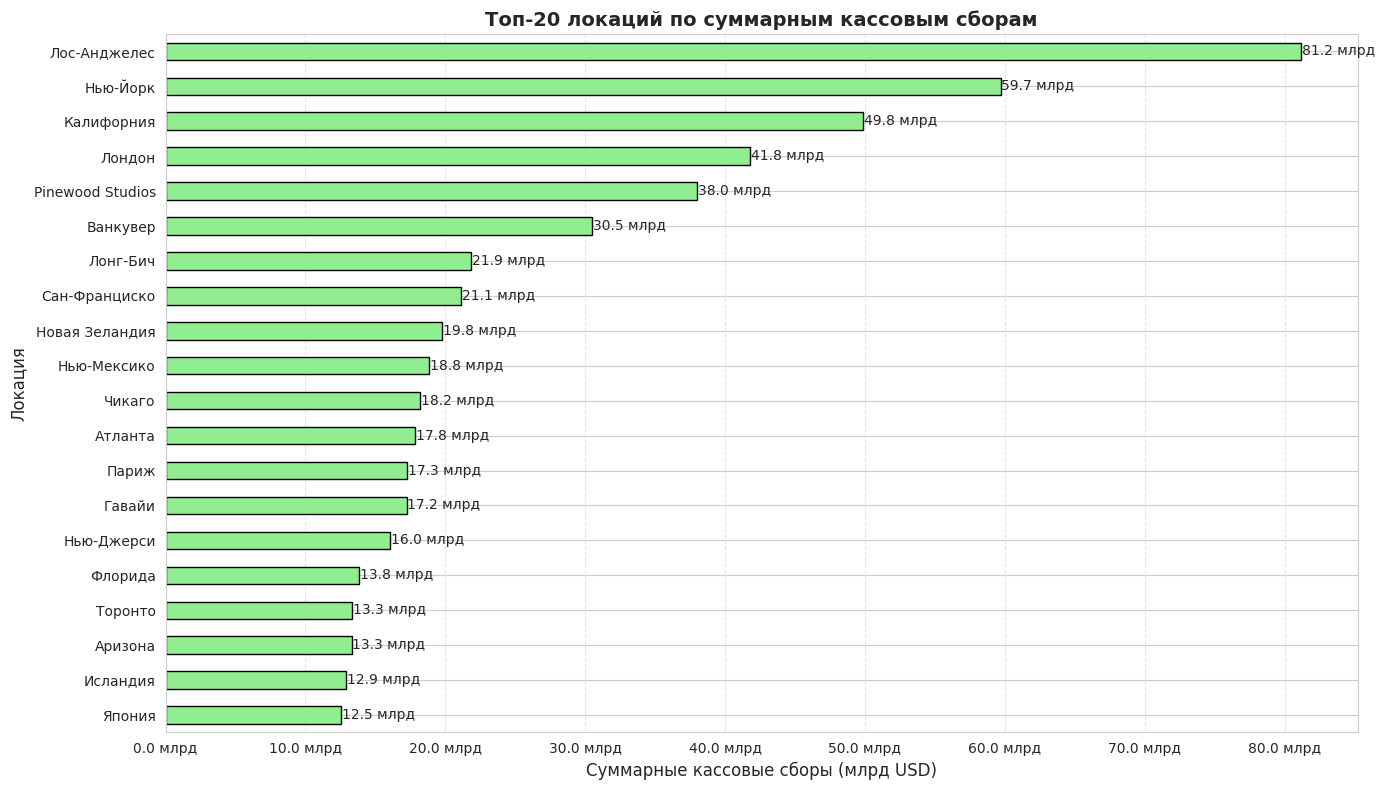


💡 Инсайт 4: Локации с небольшим числом фильмов могут иметь очень высокие средние сборы за счёт отдельных кассовых хитов, в то время как популярные локации показывают средние результаты.


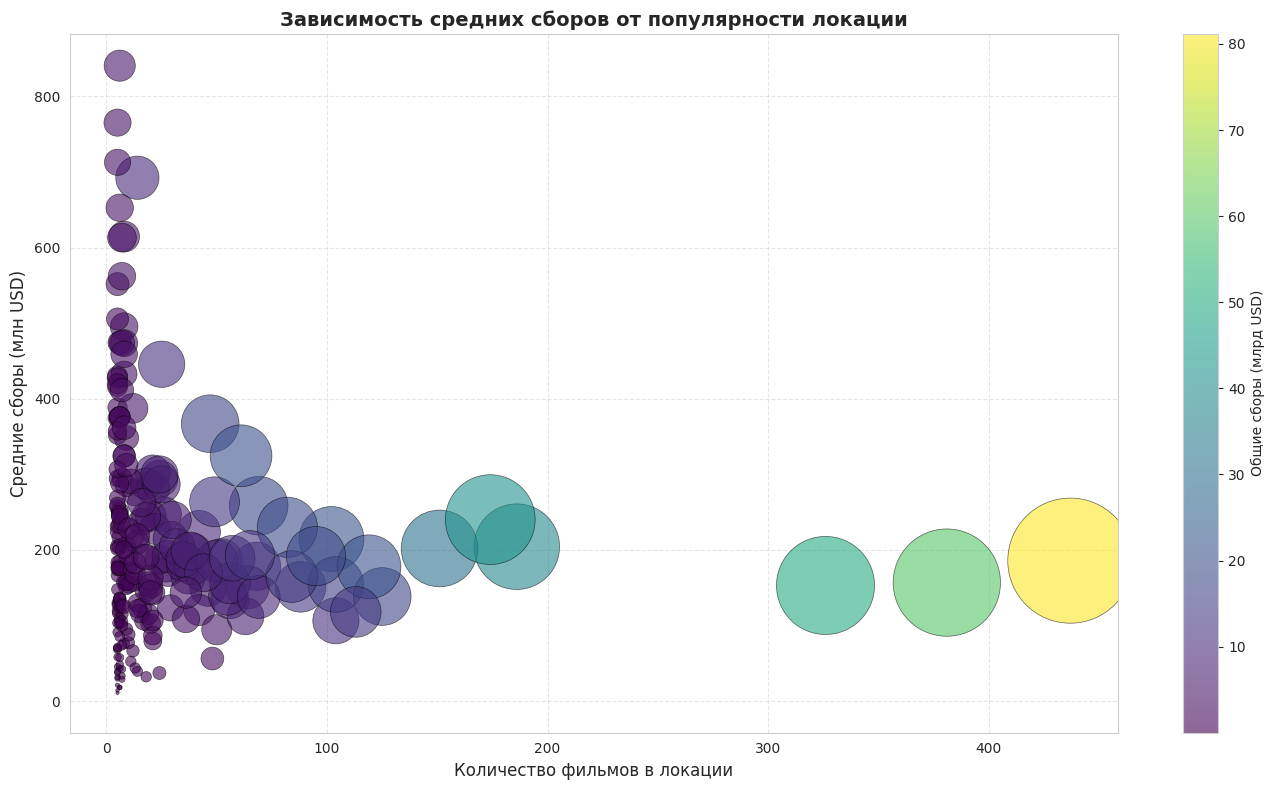


💡 Инсайт 5: В Лос-Анджелесе и Нью-Йорке наблюдается огромный разброс сборов: от малобюджетных фильмов до блокбастеров. В студийных локациях (Pinewood) сборы в среднем выше.


/tmp/ipython-input-203/3403740747.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


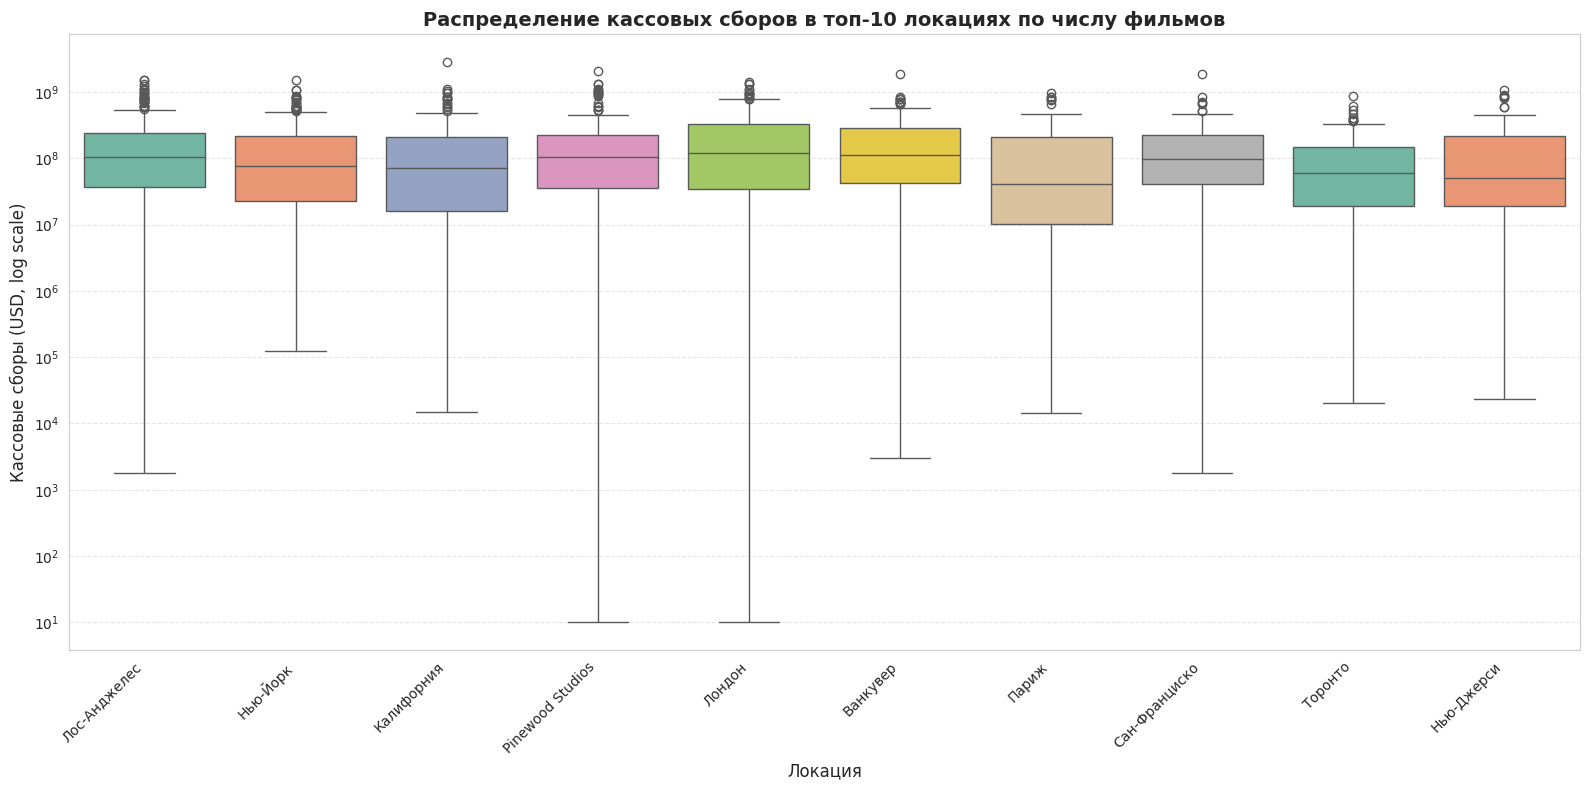


💡 Инсайт 6: Всего несколько локаций (Лос-Анджелес, Нью-Йорк, Дели) аккумулируют основную долю кассовых сборов. Остальные распределены равномерно.


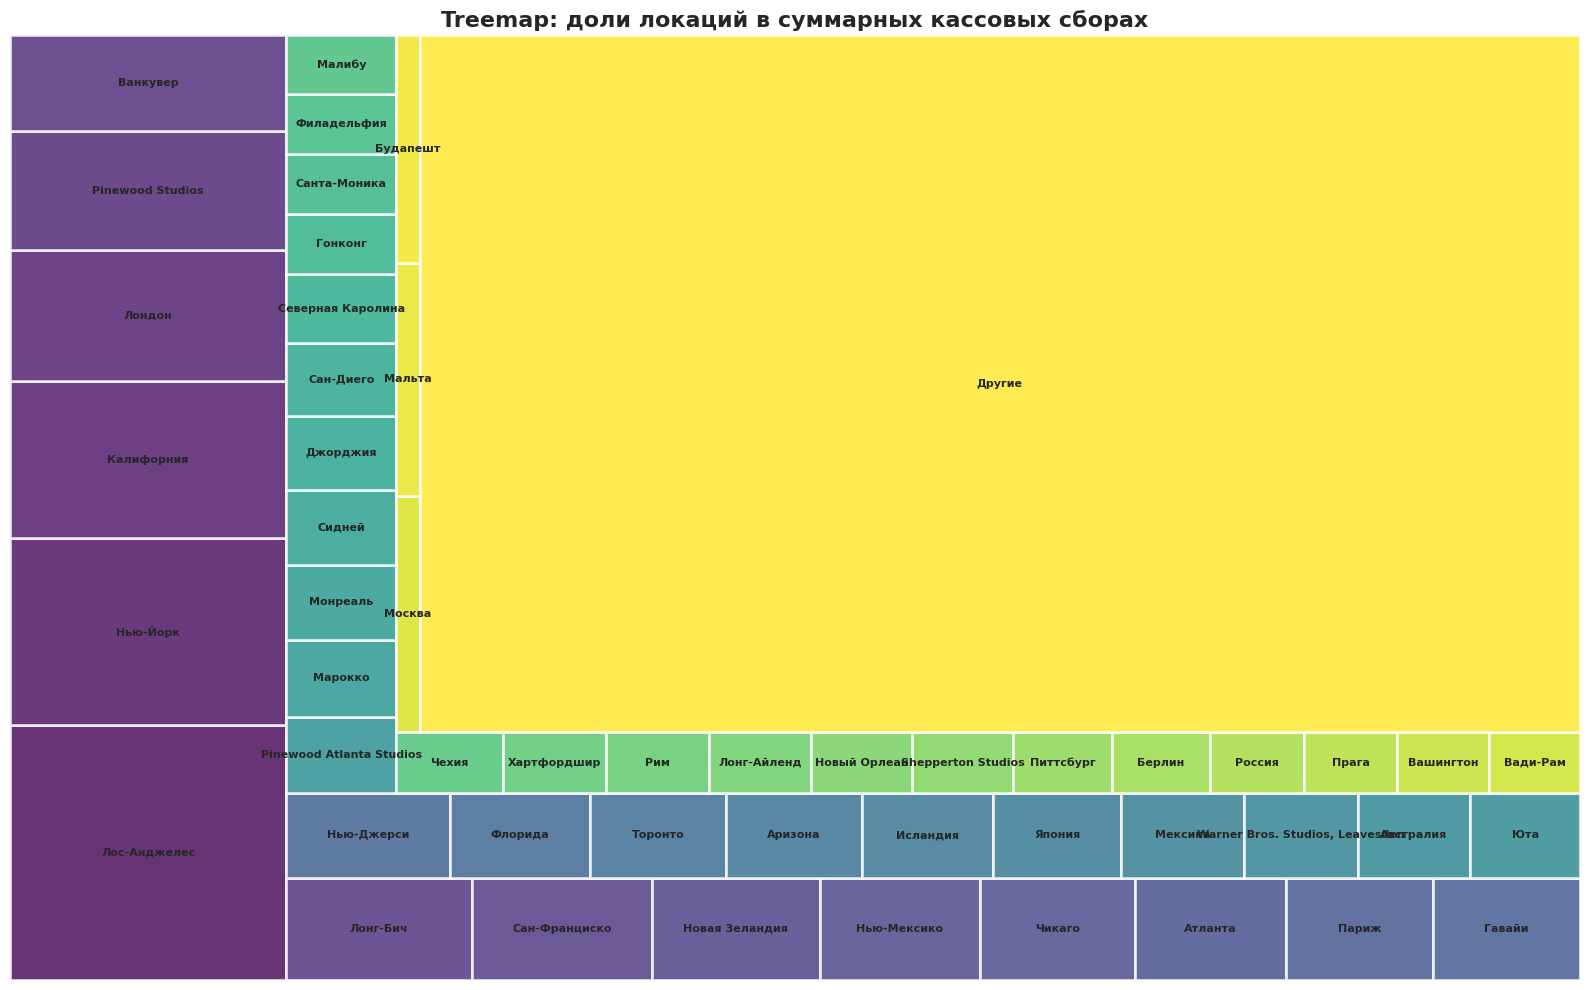


💡 Инсайт 7: Фильмы-гиганты часто снимаются в нескольких локациях одновременно, что отражает глобальный масштаб производства (например, «Аватар» — Калифорния, Новая Зеландия, Гавайи).


/tmp/ipython-input-203/3403740747.py:165: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


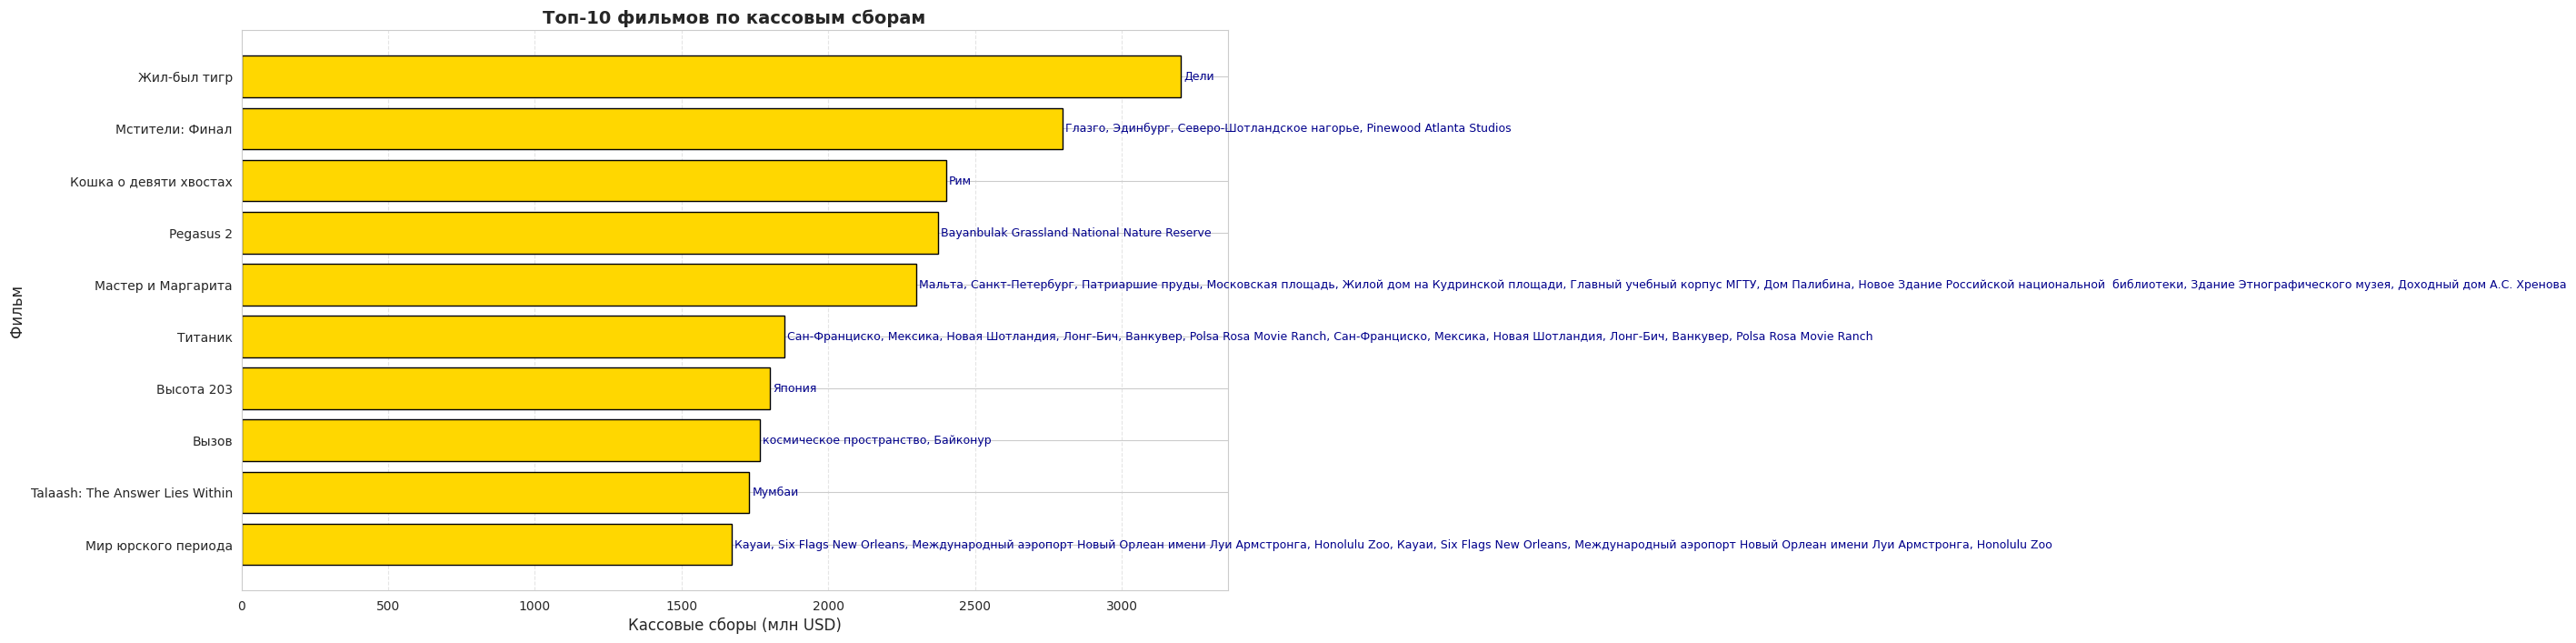


✅ Все 7 графиков успешно построены!


In [5]:
# Установка необходимых библиотек (если отсутствуют)
!pip install squarify

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Настройка стиля
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Проверка, что df_films существует (из нулевой ячейки)
if 'df_films' not in globals():
    raise NameError("❌ df_films не найден. Сначала выполните нулевую ячейку с загрузкой данных.")

# ============================================================
# График 1: Гистограмма распределения кассовых сборов
# ============================================================
print("\n💡 Инсайт 1: Большинство фильмов имеют сборы до 500 млн долларов, а фильмы со сборами выше 1 млрд встречаются крайне редко.")
plt.figure(figsize=(14, 6))
plt.hist(df_films['box_office'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.xlabel('Кассовые сборы (USD)', fontsize=12)
plt.ylabel('Частота (log scale)', fontsize=12)
plt.title('Распределение кассовых сборов фильмов (логарифмическая шкала)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ============================================================
# График 2: Топ-20 локаций по количеству фильмов
# ============================================================
print("\n💡 Инсайт 2: Лос-Анджелес, Нью-Йорк и Калифорния — безусловные лидеры по числу съёмок, что отражает концентрацию киноиндустрии в США.")
top_locations_count = df_films['location'].value_counts().head(20).sort_values()
plt.figure(figsize=(14, 8))
top_locations_count.plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Количество фильмов', fontsize=12)
plt.ylabel('Локация', fontsize=12)
plt.title('Топ-20 локаций по числу снятых фильмов', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
for i, v in enumerate(top_locations_count):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.show()

# ============================================================
# График 3: Топ-20 локаций по суммарным кассовым сборам
# ============================================================
print("\n💡 Инсайт 3: Дели (один фильм «Жил-был тигр») генерирует огромные сборы, обгоняя многие популярные локации. Это показывает влияние единичных блокбастеров.")
location_revenue = df_films.groupby('location')['box_office'].sum().sort_values(ascending=False).head(20).sort_values()
plt.figure(figsize=(14, 8))
location_revenue.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.xlabel('Суммарные кассовые сборы (млрд USD)', fontsize=12)
plt.ylabel('Локация', fontsize=12)
plt.title('Топ-20 локаций по суммарным кассовым сборам', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{x/1e9:.1f} млрд' for x in ticks])
for i, v in enumerate(location_revenue):
    plt.text(v + 0.5e8, i, f'{v/1e9:.1f} млрд', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# ============================================================
# График 4: Связь популярности и средних сборов (scatter plot)
# ============================================================
print("\n💡 Инсайт 4: Локации с небольшим числом фильмов могут иметь очень высокие средние сборы за счёт отдельных кассовых хитов, в то время как популярные локации показывают средние результаты.")
loc_stats = df_films.groupby('location').agg(
    film_count=('film', 'count'),
    total_revenue=('box_office', 'sum'),
    avg_revenue=('box_office', 'mean')
).reset_index()
loc_stats_filtered = loc_stats[loc_stats['film_count'] >= 5]

plt.figure(figsize=(14, 8))
sc = plt.scatter(
    loc_stats_filtered['film_count'],
    loc_stats_filtered['avg_revenue'] / 1e6,
    s=loc_stats_filtered['total_revenue'] / 1e7,
    c=loc_stats_filtered['total_revenue'] / 1e9,
    alpha=0.6,
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)
plt.colorbar(sc, label='Общие сборы (млрд USD)')
plt.xlabel('Количество фильмов в локации', fontsize=12)
plt.ylabel('Средние сборы (млн USD)', fontsize=12)
plt.title('Зависимость средних сборов от популярности локации', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ============================================================
# График 5: Ящик с усами для топ-10 локаций (логарифмическая шкала)
# ============================================================
print("\n💡 Инсайт 5: В Лос-Анджелесе и Нью-Йорке наблюдается огромный разброс сборов: от малобюджетных фильмов до блокбастеров. В студийных локациях (Pinewood) сборы в среднем выше.")
top10_locs = df_films['location'].value_counts().head(10).index
df_top10 = df_films[df_films['location'].isin(top10_locs)]

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_top10,
    x='location',
    y='box_office',
    palette='Set2',
    order=top10_locs
)
plt.yscale('log')
plt.xlabel('Локация', fontsize=12)
plt.ylabel('Кассовые сборы (USD, log scale)', fontsize=12)
plt.title('Распределение кассовых сборов в топ-10 локациях по числу фильмов', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ============================================================
# График 6: Treemap долей суммарных сборов по локациям
# ============================================================
print("\n💡 Инсайт 6: Всего несколько локаций (Лос-Анджелес, Нью-Йорк, Дели) аккумулируют основную долю кассовых сборов. Остальные распределены равномерно.")
loc_sum = df_films.groupby('location')['box_office'].sum().reset_index()
loc_sum = loc_sum.sort_values('box_office', ascending=False)
top50 = loc_sum.head(50).copy()
other_sum = loc_sum.iloc[50:]['box_office'].sum()
other_row = pd.DataFrame({'location': ['Другие'], 'box_office': [other_sum]})
treemap_data = pd.concat([top50, other_row], ignore_index=True)

plt.figure(figsize=(16, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(treemap_data)))
squarify.plot(
    sizes=treemap_data['box_office'],
    label=treemap_data['location'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=2,
    text_kwargs={'fontsize': 8, 'weight': 'bold'}
)
plt.axis('off')
plt.title('Treemap: доли локаций в суммарных кассовых сборах', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# График 7: Топ-10 фильмов по кассовым сборам с локациями
# ============================================================
print("\n💡 Инсайт 7: Фильмы-гиганты часто снимаются в нескольких локациях одновременно, что отражает глобальный масштаб производства (например, «Аватар» — Калифорния, Новая Зеландия, Гавайи).")
film_locations = df_films.groupby('film')['location'].apply(lambda x: ', '.join(x)).reset_index()
film_revenue = df_films.groupby('film')['box_office'].first().reset_index()
film_top = pd.merge(film_revenue, film_locations, on='film')
film_top = film_top.sort_values('box_office', ascending=False).head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(film_top['film'], film_top['box_office'] / 1e6, color='gold', edgecolor='black')
plt.xlabel('Кассовые сборы (млн USD)', fontsize=12)
plt.ylabel('Фильм', fontsize=12)
plt.title('Топ-10 фильмов по кассовым сборам', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, (_, row) in enumerate(film_top.iterrows()):
    plt.text(row['box_office']/1e6 + 10, i, row['location'], va='center', fontsize=9, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n✅ Все 7 графиков успешно построены!")

#1.Граф связей между локациями (NetworkX + matplotlib)

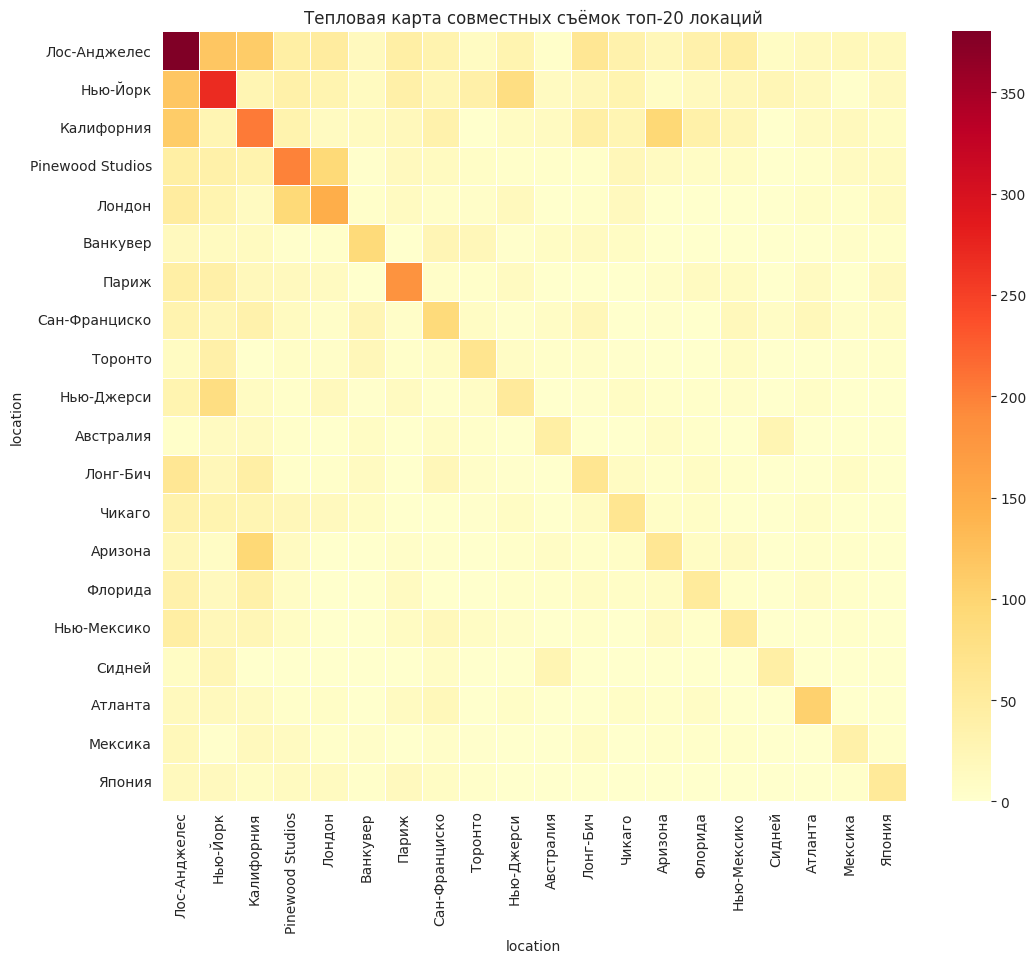

In [8]:
import seaborn as sns
import pandas as pd

top_locs = df_films['location'].value_counts().head(20).index
matrix = pd.DataFrame(0, index=top_locs, columns=top_locs)

for film, locs in film_locations.items():
    locs_in = [loc for loc in locs if loc in top_locs]
    for i in range(len(locs_in)):
        for j in range(i+1, len(locs_in)):
            matrix.loc[locs_in[i], locs_in[j]] += 1
            matrix.loc[locs_in[j], locs_in[i]] += 1

plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=False, cmap='YlOrRd', linewidths=0.5)
plt.title('Тепловая карта совместных съёмок топ-20 локаций')
plt.show()

#2.Radar chart для топ-10 локаций по нескольким метрикам

In [7]:
from math import pi
import plotly.graph_objects as go

# Подготовка данных: топ-10 локаций по количеству фильмов
top10_locs = df_films['location'].value_counts().head(10).index
stats = []
for loc in top10_locs:
    films = df_films[df_films['location'] == loc]
    stats.append({
        'location': loc,
        'count': len(films),
        'total': films['box_office'].sum(),
        'mean': films['box_office'].mean(),
        'max': films['box_office'].max()
    })

df_stats = pd.DataFrame(stats).set_index('location')
# Нормализация
df_norm = (df_stats - df_stats.min()) / (df_stats.max() - df_stats.min())

fig = go.Figure()
for loc in df_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=df_norm.loc[loc].values,
        theta=df_norm.columns,
        fill='toself',
        name=loc
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Сравнение топ-10 локаций по метрикам",
    font=dict(size=12)
)
fig.show()

#3. Parallel Coordinates для тех же локаций

In [12]:
import plotly.express as px
import numpy as np

df_log = df_stats.copy()
df_log['log_total'] = np.log10(df_log['total'] + 1)
df_log['log_mean'] = np.log10(df_log['mean'] + 1)
df_log['log_max'] = np.log10(df_log['max'] + 1)

fig = px.parallel_coordinates(
    df_log,
    dimensions=['count', 'log_total', 'log_mean', 'log_max'],
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'count': 'Кол-во фильмов', 'log_total': 'log10(Суммарные сборы)',
            'log_mean': 'log10(Средние сборы)', 'log_max': 'log10(Макс. сборы)'}
)
fig.update_layout(title="Профили топ-10 локаций (логарифмическая шкала)")
fig.show()

#4.Word Cloud из названий локаций

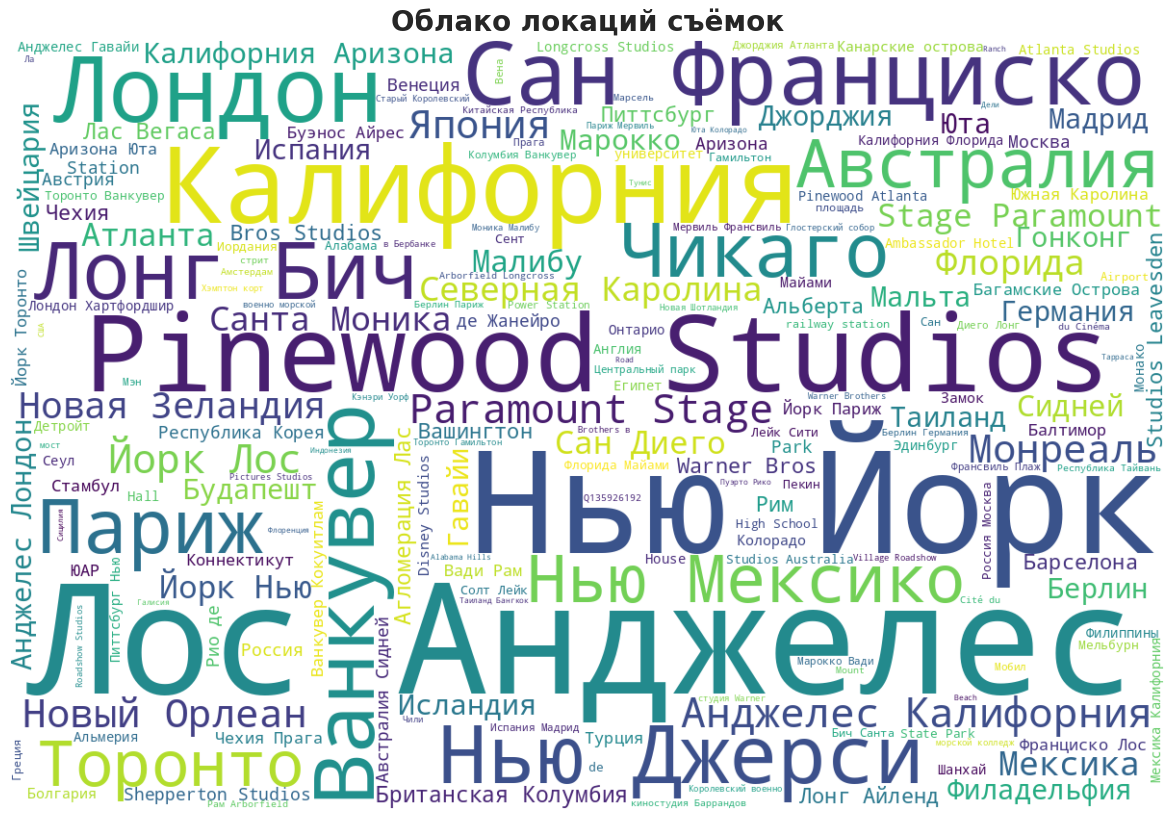

In [13]:
from wordcloud import WordCloud

text = ' '.join(df_films['location'].dropna())
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако локаций съёмок", fontsize=20, fontweight='bold')
plt.show()

#5. Диаграмма Санки (Sankey) для связей «фильм — локация»

In [15]:
import plotly.graph_objects as go

# Топ-10 фильмов по сборам
top_films = df_films.groupby('film')['box_office'].first().nlargest(10).index.tolist()
# Топ-10 локаций по количеству фильмов
top_locs = df_films['location'].value_counts().head(10).index.tolist()

# Фильтруем данные только по этим фильмам и локациям
df_sankey = df_films[df_films['film'].isin(top_films) & df_films['location'].isin(top_locs)]

# Все узлы: сначала фильмы, потом локации
all_nodes = top_films + top_locs
node_indices = {name: i for i, name in enumerate(all_nodes)}

# Подготовка связей
sources = []
targets = []
values = []
hover_texts = []

for film in top_films:
    film_data = df_sankey[df_sankey['film'] == film]
    for _, row in film_data.iterrows():
        loc = row['location']
        sources.append(node_indices[film])
        targets.append(node_indices[loc])
        # Толщина потока = кассовые сборы (можно заменить на 1, если нужно только наличие связи)
        values.append(row['box_office'])
        hover_texts.append(f"{film} → {loc}<br>Сборы: ${row['box_office']:,.0f}")

# Сокращаем длинные названия фильмов для подписей
short_labels = []
for name in all_nodes:
    if name in top_films:
        short = name[:20] + '…' if len(name) > 20 else name
    else:
        short = name
    short_labels.append(short)

# Построение диаграммы
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # для лучшей читаемости
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=short_labels,
        color=["lightblue"] * len(top_films) + ["lightgreen"] * len(top_locs),
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        hovertemplate='%{customdata}<extra></extra>',
        customdata=hover_texts
    )
)])

fig.update_layout(
    title_text="Связи топ-10 фильмов по сборам с топ-10 локациями по числу фильмов",
    font_size=12,
    width=1200,
    height=800
)
fig.show()

#6.3D Scatter Plot локаций

In [16]:
import plotly.express as px

# Сгруппируем по локациям
loc_stats = df_films.groupby('location').agg(
    film_count=('film', 'count'),
    total_revenue=('box_office', 'sum'),
    avg_revenue=('box_office', 'mean')
).reset_index()

# Добавим логарифмические столбцы
loc_stats['log_count'] = np.log1p(loc_stats['film_count'])
loc_stats['log_total'] = np.log1p(loc_stats['total_revenue'])
loc_stats['log_avg'] = np.log1p(loc_stats['avg_revenue'])

# Простая эвристика для региона (по ключевым словам)
def get_region(loc):
    if 'Los Angeles' in loc or 'California' in loc or 'Hollywood' in loc:
        return 'USA (West)'
    elif 'New York' in loc or 'NYC' in loc:
        return 'USA (East)'
    elif 'London' in loc or 'UK' in loc or 'Pinewood' in loc:
        return 'UK'
    elif 'Paris' in loc or 'France' in loc:
        return 'France'
    elif 'Australia' in loc:
        return 'Australia'
    elif 'India' in loc or 'Mumbai' in loc:
        return 'India'
    else:
        return 'Other'

loc_stats['region'] = loc_stats['location'].apply(get_region)

fig = px.scatter_3d(
    loc_stats,
    x='log_count', y='log_total', z='log_avg',
    color='region',
    size='film_count',
    hover_name='location',
    title='3D-пространство локаций: количество фильмов, суммарные и средние сборы',
    labels={'log_count': 'log(кол-во фильмов)', 'log_total': 'log(суммарные сборы)', 'log_avg': 'log(средние сборы)'}
)
fig.show()

#7.Chord Diagram (хордовая диаграмма) для взаимосвязи локаций

<Figure size 1800x1600 with 0 Axes>

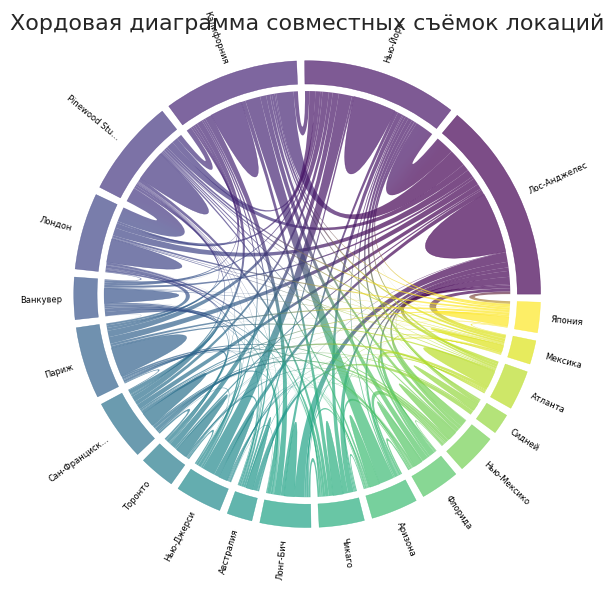

In [21]:
# Установка библиотеки (если ещё не установлена)
!pip install mpl-chord-diagram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_chord_diagram import chord_diagram

# Топ-20 локаций по количеству фильмов
top20 = df_films['location'].value_counts().head(20).index
matrix = pd.DataFrame(0, index=top20, columns=top20)

# Заполняем матрицу совместных встреч локаций в одном фильме
film_locations = df_films.groupby('film')['location'].apply(list)
for film, locs in film_locations.items():
    locs_in = [loc for loc in locs if loc in top20]
    for i in range(len(locs_in)):
        for j in range(i+1, len(locs_in)):
            matrix.loc[locs_in[i], locs_in[j]] += 1
            matrix.loc[locs_in[j], locs_in[i]] += 1

# Убираем строки/столбцы с нулевыми суммами
matrix = matrix.loc[(matrix.sum(axis=1) > 0), (matrix.sum(axis=0) > 0)]

# Создаём сокращённые названия для подписей (например, первые 10 символов)
short_names = [name[:12] + '…' if len(name) > 12 else name for name in matrix.index]

# Извлекаем матрицу
mat = matrix.values

# Строим хордовую диаграмму с улучшенными настройками
fig = plt.figure(figsize=(18, 16))
chord_diagram(
    mat,
    short_names,
    gap=0.03,
    use_gradient=True,
    fontcolor='black',
    sort='distance',
    fontsize=6,          # очень мелкий шрифт, чтобы уместиться
    rotate_names=True,   # автоматический поворот меток
    chordwidth=0.7
)
plt.title('Хордовая диаграмма совместных съёмок локаций', fontsize=16)
plt.tight_layout()
plt.show()